# Checkpoint 01 — Consumo de Energia
**Disciplina:** DISRUPTIVE ARCHITECTURES - IOT, IOB And GENERATIVE

**Aluno:** Gustavo Goulart Bretas

**RMM:** 555708

Este notebook contém a resolução do Checkpoint 01.  


## Índice
1. Preparação
2. Parte 1 — Household Power Consumption
3. Parte 2 — Continuação Household
4. Parte 3 — Appliances Dataset
5. Parte 4 — Orange


# Preparação

Nesta etapa:
- Importaremos as bibliotecas essenciais (`pandas`, `numpy`, `matplotlib`);

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv('/content/household_power_consumption.txt')

# Parte 1 — Household Power Consumption
Nesta parte, exploraremos os dados básicos do consumo de energia.

### Exercício 1
Mostre as 10 primeiras linhas do dataset

In [ ]:
df.head(10)

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
5              15.0             0.0             2.0            17.0  
6              15.8             0.0             1.0            17.0  
7              15.8             0.0             1.0            17.0  
8              15.8             0.0             1.0            17.0  
9              15.8             0.0             2.0            16.0

### Exercício 2
Explique a diferença entre as variáveis Global_active_power e Global_reactive_power

**Global_active_power**: potência ativa consumida (kW) — energia que realiza trabalho útil (luzes, motores, aquecedores).

**Global_reactive_power**: potência reativa (kW) — relacionada a componentes indutivos/capacitores; não realiza trabalho útil mas influencia qualidade de energia.


### Exercício 3
Verifique se existem valores ausentes no dataset. Quantifique-os

In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing>0]

Series([], dtype: int64)

### Exercício 4
Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana
correspondente

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['weekday'].value_counts()

weekday
Sunday       296640
Monday       296640
Tuesday      296640
Thursday     296640
Wednesday    296640
Friday       296463
Saturday     295596
Name: count, dtype: int64

### Exercício 5
 Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de
Global_active_power

In [ ]:
df2007 = df[df['year'] == 2007].copy()
daily_mean_2007 = df2007.groupby(df2007['Date'])['Global_active_power'].mean().rename('mean_GAP_2007')
daily_mean_2007.head()

Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: mean_GAP_2007, dtype: float64

### Exercício 6
Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à
sua escolha

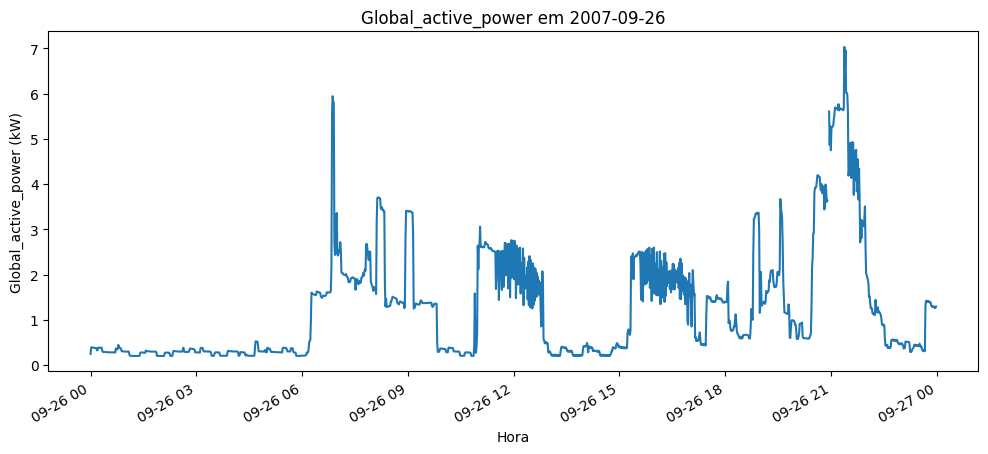

In [ ]:
day = pd.to_datetime('2007-09-26').date()
mask = df['Date'].dt.date == day
subset = df.loc[mask].set_index('DateTime')
if subset.empty:
    print("Nenhum dado para", day)
else:
    plt.figure()
    plt.plot(subset.index, subset['Global_active_power'])
    plt.title(f"Global_active_power em {day}")
    plt.xlabel("Hora")
    plt.ylabel("Global_active_power (kW)")
    plt.gcf().autofmt_xdate()
    plt.show()

### Exercício 7
Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

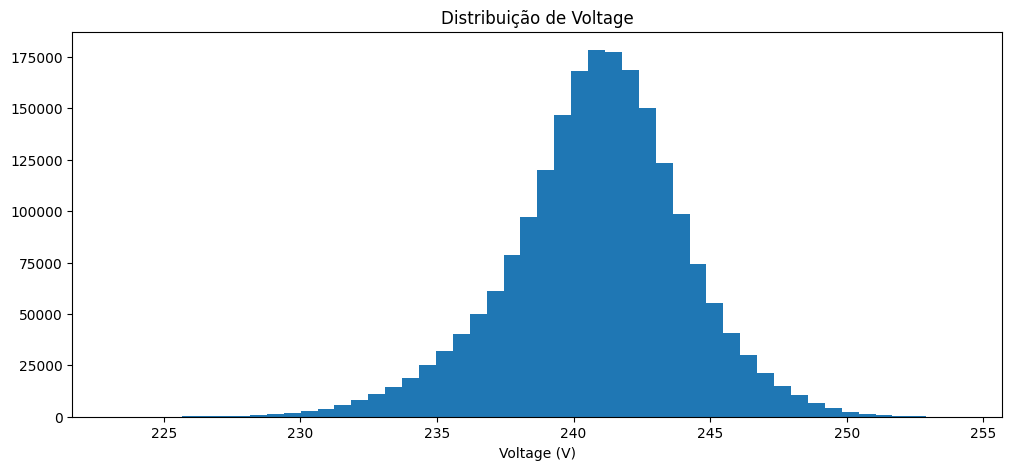

count    2.049280e+06
mean     2.408399e+02
std      3.239987e+00
min      2.232000e+02
25%      2.389900e+02
50%      2.410100e+02
75%      2.428900e+02
max      2.541500e+02
Name: Voltage, dtype: float64

In [ ]:
plt.figure()
plt.hist(df['Voltage'].dropna(), bins=50)
plt.title("Distribuição de Voltage")
plt.xlabel("Voltage (V)")
plt.show()

# Estatísticas resumidas
df['Voltage'].describe()

### Exercício 8
Calcule o consumo médio por mês em todo o período disponível no dataset

In [ ]:
monthly_mean = df.groupby('year_month')['Global_active_power'].mean().rename('monthly_mean_GAP')
monthly_mean.head(12)

year_month
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
Freq: M, Name: monthly_mean_GAP, dtype: float64

### Exercício 9
Identifique o dia com maior consumo de energia ativa global (Global_active_power)

In [ ]:
daily_total = df.groupby(df['Date'])['Global_active_power'].sum().rename('daily_total_GAP')
max_day = daily_total.idxmax()
max_val = daily_total.max()
print("Dia com maior consumo:", max_day.date() if hasattr(max_day,'date') else max_day, "->", max_val)


Dia com maior consumo: 2006-12-23 -> 4773.386


### Exercício 10
Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [ ]:
means = df.groupby('is_weekend')['Global_active_power'].mean()
means.index = ['weekday' if not x else 'weekend' for x in means.index]
means

weekday    1.035472
weekend    1.234232
Name: Global_active_power, dtype: float64

### Exercício 11
Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power,
Voltage e Global_intensity.


In [ ]:
corr = df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].corr()
corr

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000

### Exercício 12
 Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3


In [ ]:
mean_gap = df['Global_active_power'].mean()
monthly_sub_mean = df.groupby('year_month')['Total_Sub_metering'].mean()
exceed = monthly_sub_mean[monthly_sub_mean > mean_gap]
print("Média geral Global_active_power:", mean_gap)
print("Meses em que Total_Sub_metering (média mensal) > média geral de GAP:")
exceed

Média geral Global_active_power: 1.0916150365006245
Meses em que Total_Sub_metering (média mensal) > média geral de GAP:


year_month
2006-12    10.871204
2007-01    10.423051
2007-02     9.485665
2007-03    10.212634
2007-04     6.249954
2007-05     8.452442
2007-06     7.371806
2007-07     5.681004
2007-08     6.975896
2007-09     8.205856
2007-10     8.674104
2007-11     9.818958
2007-12    11.636290
2008-01     9.785999
2008-02     8.447222
2008-03     9.454682
2008-04     9.574745
2008-05     9.019064
2008-06     9.775000
2008-07     7.145094
2008-08     2.370116
2008-09     8.825185
2008-10     8.584409
2008-11     9.133542
2008-12     8.779391
2009-01    10.690166
2009-02     9.770536
2009-03     9.896259
2009-04     9.605255
2009-05     9.066241
2009-06     7.433611
2009-07     5.571013
2009-08     5.920789
2009-09     9.127153
2009-10     9.766174
2009-11    10.403866
2009-12    11.093190
2010-01    11.343369
2010-02    12.762202
2010-03     9.415614
2010-04     9.508403
2010-05    10.419086
2010-06     9.730463
2010-07     5.486962
2010-08     4.472917
2010-09     7.574861
2010-10     9.500179
2010-11     9.005099
Freq: M, Name: Total_Sub_metering, dtype: float64

### Exercício 12/13
- Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3

- Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de
Global_active_power.


In [ ]:
mean_gap = df['Global_active_power'].mean()
monthly_sub_mean = df.groupby('year_month')['Total_Sub_metering'].mean()
exceed = monthly_sub_mean[monthly_sub_mean > mean_gap]
print("Média geral Global_active_power:", mean_gap)
print("Meses em que Total_Sub_metering (média mensal) > média geral de GAP:")
exceed

Média geral Global_active_power: 1.0916150365006245
Meses em que Total_Sub_metering (média mensal) > média geral de GAP:


year_month
2006-12    10.871204
2007-01    10.423051
2007-02     9.485665
2007-03    10.212634
2007-04     6.249954
2007-05     8.452442
2007-06     7.371806
2007-07     5.681004
2007-08     6.975896
2007-09     8.205856
2007-10     8.674104
2007-11     9.818958
2007-12    11.636290
2008-01     9.785999
2008-02     8.447222
2008-03     9.454682
2008-04     9.574745
2008-05     9.019064
2008-06     9.775000
2008-07     7.145094
2008-08     2.370116
2008-09     8.825185
2008-10     8.584409
2008-11     9.133542
2008-12     8.779391
2009-01    10.690166
2009-02     9.770536
2009-03     9.896259
2009-04     9.605255
2009-05     9.066241
2009-06     7.433611
2009-07     5.571013
2009-08     5.920789
2009-09     9.127153
2009-10     9.766174
2009-11    10.403866
2009-12    11.093190
2010-01    11.343369
2010-02    12.762202
2010-03     9.415614
2010-04     9.508403
2010-05    10.419086
2010-06     9.730463
2010-07     5.486962
2010-08     4.472917
2010-09     7.574861
2010-10     9.500179
2010-11     9.005099
Freq: M, Name: Total_Sub_metering, dtype: float64

### Exercício 14
Faça um gráfico de série temporal do Voltage para o ano de 2008.


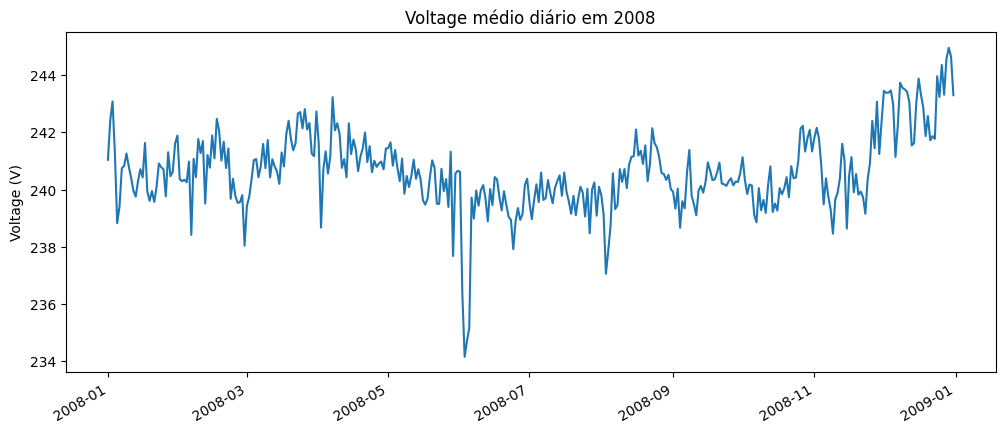

In [ ]:
mask2008 = df['year'] == 2008
v2008 = df.loc[mask2008].set_index('DateTime')['Voltage'].resample('D').mean()
plt.figure()
plt.plot(v2008.index, v2008.values)
plt.title("Voltage médio diário em 2008")
plt.ylabel("Voltage (V)")
plt.gcf().autofmt_xdate()
plt.show()

### Exercício 15
Compare o consumo entre os meses de verão e inverno (no hemisfério norte)


In [ ]:
summer = [6,7,8]
winter = [12,1,2]
summer_mean = df[df['month'].isin(summer)]['Global_active_power'].mean()
winter_mean = df[df['month'].isin(winter)]['Global_active_power'].mean()
print("Média (verão N.H.):", summer_mean)
print("Média (inverno N.H.):", winter_mean)


Média (verão N.H.): 0.7266815219278782
Média (inverno N.H.): 1.4176230462106605


### Exercício 16
Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa


In [ ]:
sample_1pct = df.sample(frac=0.01, random_state=42)
print("Tamanhos -> base:", len(df), "amostra 1%:", len(sample_1pct))
print("\nResumo base completa (Global_active_power):")
print(df['Global_active_power'].describe())


Tamanhos -> base: 2075259 amostra 1%: 20753

Resumo base completa (Global_active_power):
count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64


### Exercício 16
Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa


In [ ]:
sample_1pct = df.sample(frac=0.01, random_state=42)
print("Tamanhos -> base:", len(df), "amostra 1%:", len(sample_1pct))
print("\nResumo base completa (Global_active_power):")
print(df['Global_active_power'].describe())


Tamanhos -> base: 2075259 amostra 1%: 20753

Resumo base completa (Global_active_power):
count    2.049280e+06
mean     1.091615e+00
std      1.057294e+00
min      7.600000e-02
25%      3.080000e-01
50%      6.020000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64


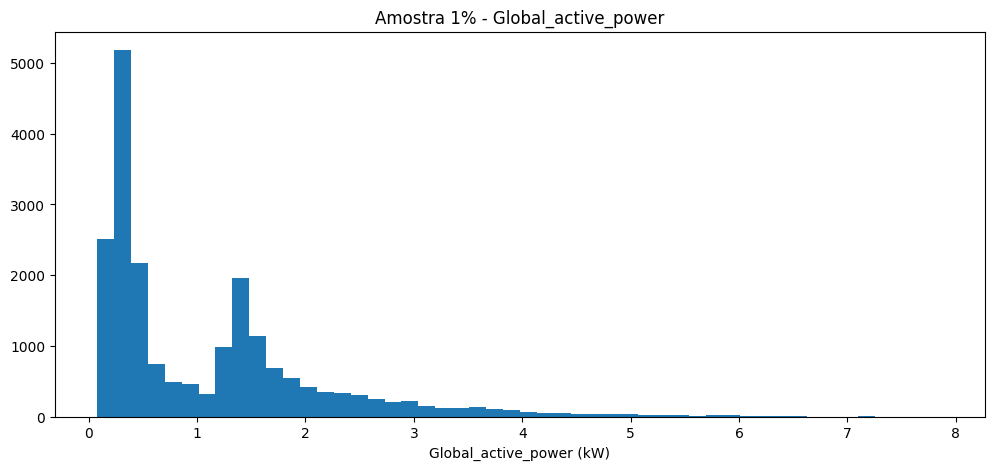

Base mean/median: 1.0916150365006245 0.602
Amostra mean/median: 1.0974987796543982 0.608


In [ ]:
plt.figure()
plt.hist(sample_1pct['Global_active_power'].dropna(), bins=50)
plt.title("Amostra 1% - Global_active_power")
plt.xlabel("Global_active_power (kW)")
plt.show()

print("Base mean/median:", df['Global_active_power'].mean(), df['Global_active_power'].median())
print("Amostra mean/median:", sample_1pct['Global_active_power'].mean(), sample_1pct['Global_active_power'].median())


### Exercício 17
Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.


In [ ]:
cols_mm = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
mm = df[cols_mm].copy()
mm = (mm - mm.min()) / (mm.max() - mm.min())
mm.describe().loc[['min','max']]


Global_active_power  Global_reactive_power  Voltage  Global_intensity
min                  0.0                    0.0      0.0               0.0
max                  1.0                    1.0      1.0               1.0

### Exercício 18
Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico.
Interprete os resultados


Aplicação do Kmeans:

In [ ]:
def kmeans_numpy(X, k, n_iter=100, seed=42):
    rng = np.random.default_rng(seed)
    n, d = X.shape
    centroids = X[rng.choice(n, size=k, replace=False)]
    for i in range(n_iter):
        dists = np.sqrt(((X[:, None, :] - centroids[None, :, :])**2).sum(axis=2))
        labels = dists.argmin(axis=1)
        new_centroids = np.array([X[labels==j].mean(axis=0) if np.any(labels==j) else centroids[j] for j in range(k)])
        if np.allclose(new_centroids, centroids, atol=1e-6, rtol=1e-6):
            break
        centroids = new_centroids
    return labels, centroids


O Exercicio:

In [ ]:
# Agregar por dia
daily = df.groupby(df['Date']).agg({
    'Global_active_power':'mean',
    'Global_reactive_power':'mean',
    'Voltage':'mean',
    'Global_intensity':'mean',
    'Total_Sub_metering':'sum'
}).dropna()

X_daily = daily[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].values
# normalizar por z-score simples
Xd = (X_daily - X_daily.mean(axis=0)) / X_daily.std(axis=0)

labels_daily, centers = kmeans_numpy(Xd, k=3, n_iter=200)
daily['cluster'] = labels_daily
print(daily['cluster'].value_counts())

# Mostrar centros (em escala original aproximada)
print("Centroidas (escala z):")
centers


cluster
1    595
0    566
2    272
Name: count, dtype: int64
Centroidas (escala z):


array([[ 0.16204235, -0.60145882,  0.47184106,  0.13779821],
       [-0.80671776,  0.35124069, -0.45572371, -0.7881681 ],
       [ 1.42750404,  0.48322604,  0.01504989,  1.43737586]])

### Exercício 19
Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para
Global_active_power em um período de 6 meses


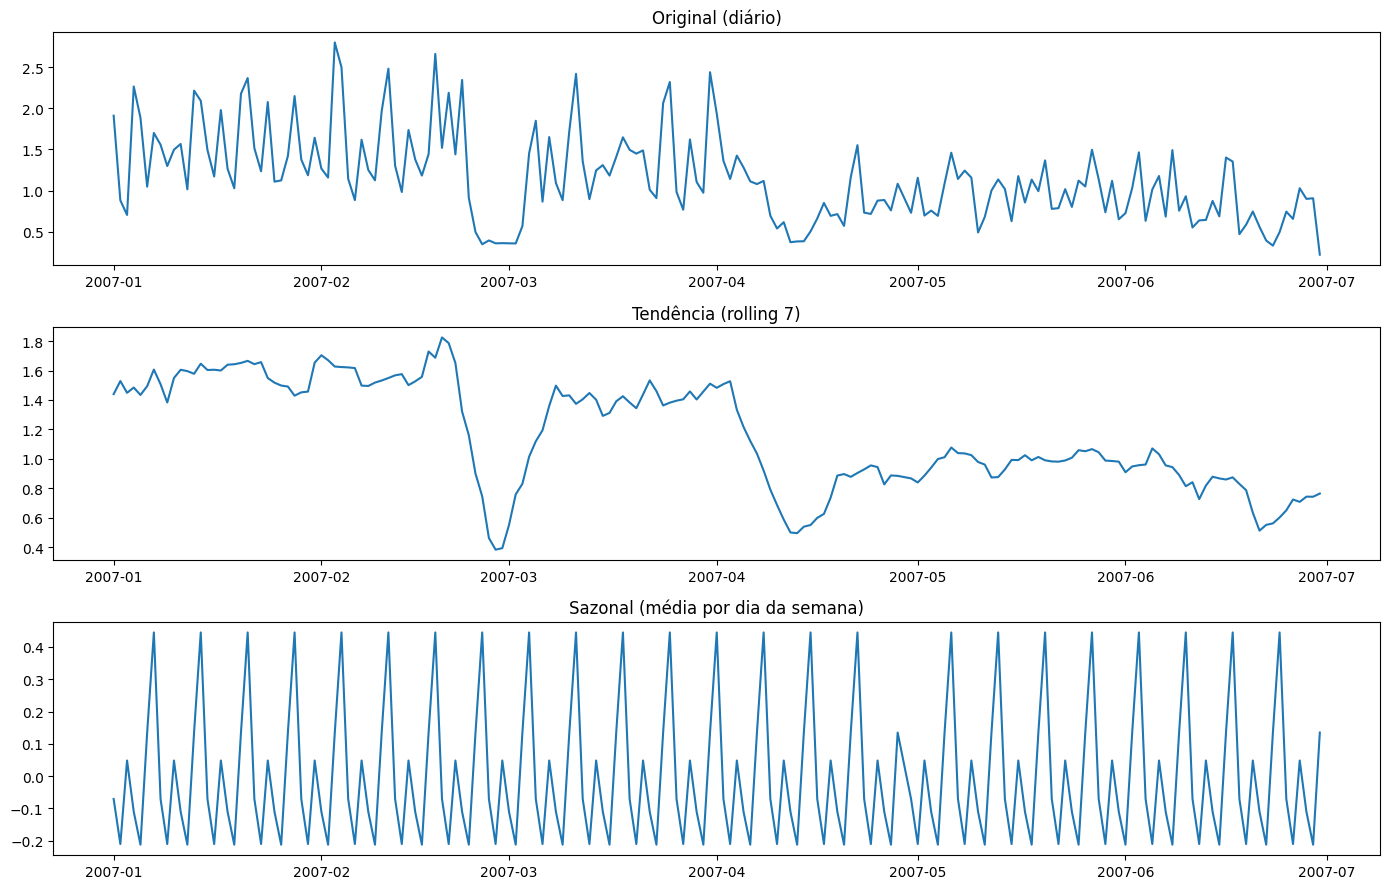

In [ ]:
# Selecionar período
start = pd.to_datetime('2007-01-01')
end = pd.to_datetime('2007-06-30')
mask = (df['DateTime'] >= start) & (df['DateTime'] <= end)
series6 = df.loc[mask].set_index('DateTime')['Global_active_power'].resample('D').mean().dropna()

# Tendência
trend = series6.rolling(window=7, center=True, min_periods=3).mean()
detrended = series6 - trend

# Sazonalidade
seasonal = detrended.groupby(detrended.index.dayofweek).transform('mean')
residual = series6 - trend - seasonal

# paiines
plt.figure(figsize=(14,9))
plt.subplot(3,1,1); plt.plot(series6.index, series6.values); plt.title("Original (diário)")
plt.subplot(3,1,2); plt.plot(trend.index, trend.values); plt.title("Tendência (rolling 7)")
plt.subplot(3,1,3); plt.plot(seasonal.index, seasonal.values); plt.title("Sazonal (média por dia da semana)")
plt.tight_layout()
plt.show()


### Exercício 20
 Treine um modelo de regressão linear simples para prever Global_active_power a partir de
Global_intensity. Avalie o erro do modelo


In [ ]:
mask = df[['Global_active_power','Global_intensity']].dropna().index
x = df.loc[mask,'Global_intensity'].values
y = df.loc[mask,'Global_active_power'].values
# Ajuste linear
coef = np.polyfit(x, y, 1)   # coef[0]*x + coef[1]
pred = np.polyval(coef, x)
rmse = np.sqrt(np.mean((y - pred)**2))
print("Coef linear (slope, intercept):", coef)
print("RMSE:", rmse)


Coef linear (slope, intercept): [ 0.23762937 -0.00807649]
RMSE: 0.04983393469359749


#  Parte 2 — Análises Avançadas no Household
Inclui: correlação, séries temporais, PCA, KMeans e regressões.

### Exercício 21
Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo

In [ ]:
ts = df.set_index('DateTime').sort_index()
hourly = ts['Global_active_power'].resample('H').mean()
hourly_mean_by_hour = hourly.groupby(hourly.index.hour).mean().sort_values(ascending=False)
hourly_mean_by_hour.head(10)

/tmp/ipython-input-2924577684.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = ts['Global_active_power'].resample('H').mean()


DateTime
20    1.899073
21    1.876063
19    1.733428
7     1.502373
8     1.460940
22    1.412681
9     1.331642
18    1.326433
10    1.260913
11    1.246408
Name: Global_active_power, dtype: float64

### Exercício 22
Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [ ]:
s = hourly.dropna()
print("ACF lag 1 (1h):", s.autocorr(lag=1))
print("ACF lag 24 (24h):", s.autocorr(lag=24))
print("ACF lag 48 (48h):", s.autocorr(lag=48))

ACF lag 1 (1h): 0.713343387922962
ACF lag 24 (24h): 0.4351862386607033
ACF lag 48 (48h): 0.3990179423908085


### Exercício 23
Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.

In [64]:
pca_df = df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].dropna()
X = pca_df.values
Xc = X - X.mean(axis=0)
U, S, Vt = np.linalg.svd(Xc, full_matrices=False)

n = X.shape[0]
eigenvals = (S**2) / (n - 1)
explained_ratio = eigenvals / eigenvals.sum()
print("Explained variance ratio (primeiros 4):", explained_ratio)

scores = Xc.dot(Vt.T)

pd.DataFrame(scores[:, :2], columns=['PC1','PC2']).head()


Explained variance ratio (primeiros 4): [7.54421576e-01 2.45132173e-01 3.91421181e-04 5.48301036e-05]


PC1       PC2
0 -15.337619 -0.468435
1 -20.148362 -1.355780
2 -20.294107 -1.048639
3 -20.108530 -1.458663
4 -12.574047 -0.118703

### Exercício 24
Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

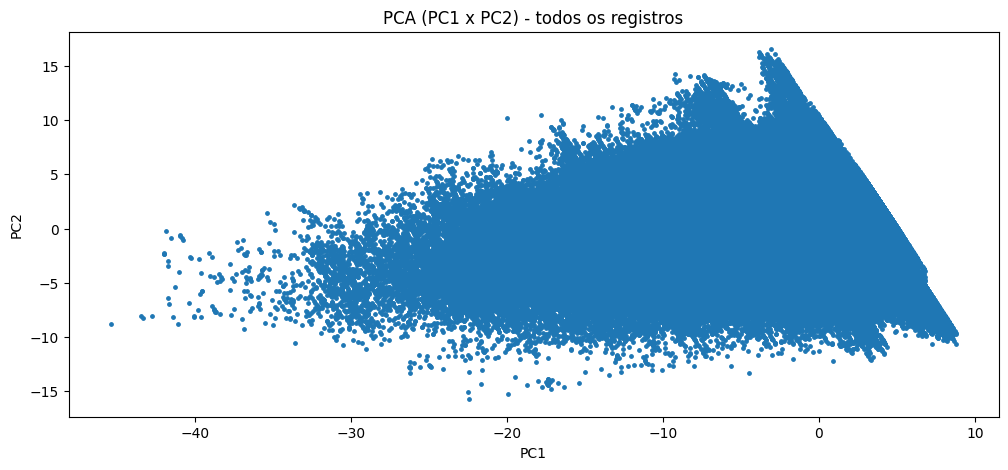

In [65]:
plt.figure()
plt.scatter(scores[:,0], scores[:,1], s=6)
plt.title("PCA (PC1 x PC2) - todos os registros")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()



### Exercício 25
 Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

RMSE Linear: 0.9691358326247439
RMSE Polinomial grau 2: 0.9648154069545047


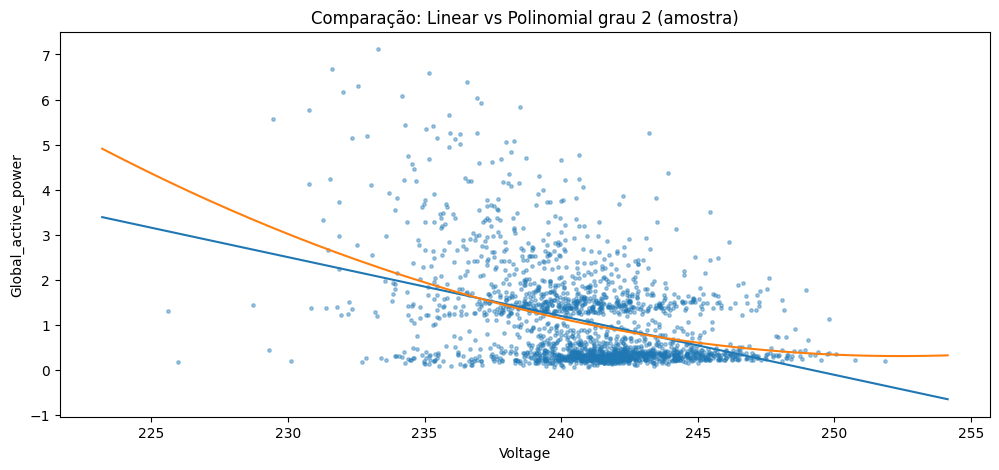

In [66]:
tmp = df[['Global_active_power','Voltage']].dropna()
x = tmp['Voltage'].values
y = tmp['Global_active_power'].values
coef_lin = np.polyfit(x, y, 1)
coef_poly2 = np.polyfit(x, y, 2)
pred_lin = np.polyval(coef_lin, x)
pred_poly2 = np.polyval(coef_poly2, x)
rmse_lin = np.sqrt(np.mean((y - pred_lin)**2))
rmse_poly2 = np.sqrt(np.mean((y - pred_poly2)**2))
print("RMSE Linear:", rmse_lin)
print("RMSE Polinomial grau 2:", rmse_poly2)


idx = np.random.choice(len(x), size=min(2000, len(x)), replace=False)
plt.figure()
plt.scatter(x[idx], y[idx], s=6, alpha=0.4)
xx = np.linspace(x.min(), x.max(), 200)
plt.plot(xx, np.polyval(coef_lin, xx))
plt.plot(xx, np.polyval(coef_poly2, xx))
plt.title("Comparação: Linear vs Polinomial grau 2 (amostra)")
plt.xlabel("Voltage"); plt.ylabel("Global_active_power")
plt.show()



# Parte 3 — Appliances Dataset
Trabalharemos com o dataset de consumo de aparelhos doméstico

### Exercício 26
Carregamento e inspeção inicial
- Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe())

In [71]:
ap = pd.read_csv(APPLIANCES_CSV)

print("Dimensão do dataset:", ap.shape)

ap.info()

ap.describe()

Dimensão do dataset: (19735, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

                 T5          RH_5            T6          RH_6            T7  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      19.592106     50.949283      7.910939     54.609083     20.267106   
std        1.844623      9.022034      6.090347     31.149806      2.109993   
min       15.330000     29.815000     -6.065000      1.000000     15.390000   
25%       18.277500     45.400000      3.626667     30.025000     18.700000   
50%       19.390000     49.090000      7.300000     55.290000     20.033333   
75%       20.619643     53.663333     11.256000     83.226667     21.600000   
max       25.795000     96.321667     28.290000     99.900000     26.000000   

               RH_7            T8          RH_8            T9          RH_9  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      35.388200     22.029107     42.936165     19.485828     41.552401   
std        5.114208      1.956162      5.224361      2.014712      4.151497   
min       23.200000     16.306667     29.600000     14.890000     29.166667   
25%       31.500000     20.790000     39.066667     18.000000     38.500000   
50%       34.863333     22.100000     42.375000     19.390000     40.900000   
75%       39.000000     23.390000     46.536000     20.600000     44.338095   
max       51.400000     27.230000     58.780000     24.500000     53.326667   

              T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.411665    755.522602     79.750418      4.039752     38.330834   
std        5.317409      7.399441     14.901088      2.451221     11.794719   
min       -5.000000    729.300000     24.000000      0.000000      1.000000   
25%        3.666667    750.933333     70.333333      2.000000     29.000000   
50%        6.916667    756.100000     83.666667      3.666667     40.000000   
75%       10.408333    760.933333     91.666667      5.500000     40.000000   
max       26.100000    772.300000    100.000000     14.000000     66.000000   

          Tdewpoint           rv1           rv2  
count  19735.000000  19735.000000  19735.000000  
mean       3.760707     24.988033     24.988033  
std        4.194648     14.496634     14.496634  
min       -6.600000      0.005322      0.005322  
25%        0.900000     12.497889     12.497889  
50%        3.433333     24.897653     24.897653  
75%        6.566667     37.583769     37.583769  
max       15.500000     49.996530     49.996530

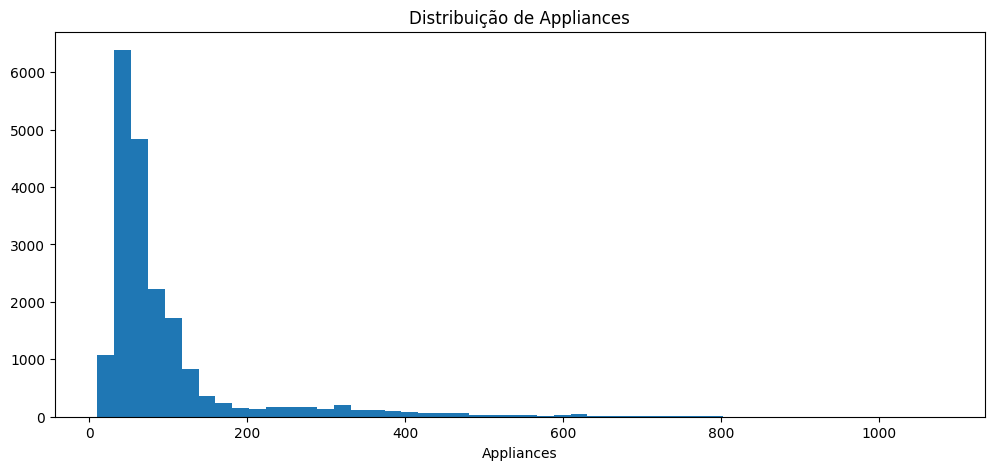

In [ ]:
plt.figure()
plt.hist(ap['Appliances'].dropna(), bins=50)
plt.title("Distribuição de Appliances")
plt.xlabel("Appliances")
plt.show()

### Exercício 27
Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

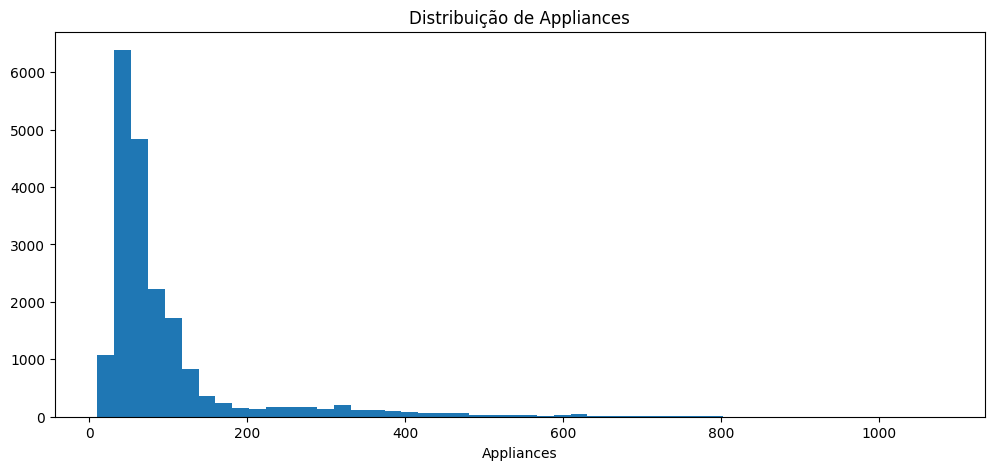

In [ ]:
plt.figure()
plt.hist(ap['Appliances'].dropna(), bins=50)
plt.title("Distribuição de Appliances")
plt.xlabel("Appliances")
plt.show()

### Exercício 28
Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?


In [75]:
ap['date'] = pd.to_datetime(ap['date'])
corr_ap = ap.corr(numeric_only=True)
corr_ap['Appliances'].sort_values(ascending=False).head(15)

Appliances    1.000000
lights        0.197278
T2            0.120073
T6            0.117638
T_out         0.099155
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
T7            0.025801
T5            0.019760
RH_4          0.016965
Name: Appliances, dtype: float64

### Exercício 29
Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.


In [76]:
numeric_cols = ap.select_dtypes(include='number').columns.tolist()
ap_mm = ap.copy()
for c in numeric_cols:
    minv = ap_mm[c].min(); maxv = ap_mm[c].max()
    ap_mm[c] = (ap_mm[c] - minv) / (maxv - minv)
ap_mm[numeric_cols].describe().loc[['min','max']]


Appliances  lights   T1  RH_1   T2  RH_2   T3  RH_3   T4  RH_4   T5  \
min         0.0     0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
max         1.0     1.0  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0  1.0   

     RH_5   T6  RH_6   T7  RH_7   T8  RH_8   T9  RH_9  T_out  Press_mm_hg  \
min   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0    0.0          0.0   
max   1.0  1.0   1.0  1.0   1.0  1.0   1.0  1.0   1.0    1.0          1.0   

     RH_out  Windspeed  Visibility  Tdewpoint  rv1  rv2  
min     0.0        0.0         0.0        0.0  0.0  0.0  
max     1.0        1.0         1.0        1.0  1.0  1.0

### Exercício 30
PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?



Explained variance ratio (2 primeiros): [0.82804775 0.09144159]


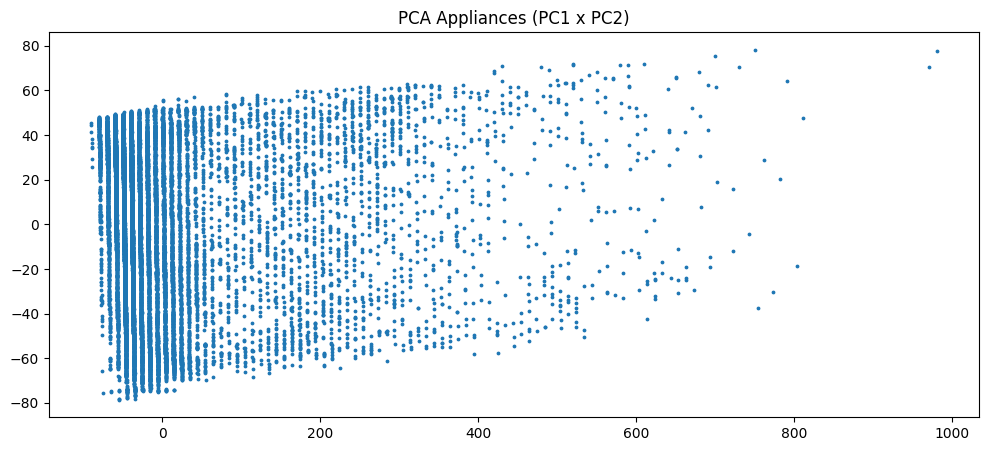

In [77]:
Xap = ap[numeric_cols].dropna().values
Xap_c = Xap - Xap.mean(axis=0)
Ua, Sa, Vta = np.linalg.svd(Xap_c, full_matrices=False)
eigenvals_a = (Sa**2) / (Xap.shape[0] - 1)
explained_ratio_a = eigenvals_a / eigenvals_a.sum()
print("Explained variance ratio (2 primeiros):", explained_ratio_a[:2])

scores_ap = Xap_c.dot(Vta.T)
plt.figure()
plt.scatter(scores_ap[:,0], scores_ap[:,1], s=3)
plt.title("PCA Appliances (PC1 x PC2)")
plt.show()


### Exercício 31
Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.


In [78]:
features = ['T1','RH_1','T2','RH_2']
subset = ap.dropna(subset=features + ['Appliances'])
X = subset[features].values
y = subset['Appliances'].values

X_design = np.hstack([np.ones((X.shape[0],1)), X])
coef_lin_multi, *_ = np.linalg.lstsq(X_design, y, rcond=None)
pred = X_design.dot(coef_lin_multi)
rmse = np.sqrt(np.mean((y - pred)**2))
print("Coeficientes (intercept + features):", coef_lin_multi)
print("RMSE:", rmse)


Coeficientes (intercept + features): [ 65.99549885  22.40203729  19.77047429 -23.64457133 -19.02797248]
RMSE: 98.84667114960246


### Exercício 32
Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances
- Compare o RMSE com a regressão linear


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

X = ap[['T1','RH_1','T2','RH_2','T3','RH_3','T_out','RH_out']]
y = ap['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)

print("RMSE Linear:", np.sqrt(mean_squared_error(y_test, lin.predict(X_test))))
print("RMSE Random Forest:", np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))


RMSE Linear: 101.67416049340423
RMSE Random Forest: 77.5241601969261


### Exercício 33
K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.

In [82]:
kX = ap[['Appliances','T1','RH_1']].dropna().values
kXz = (kX - kX.mean(axis=0)) / kX.std(axis=0)
labels_k, centers_k = kmeans_numpy(kXz, k=4, n_iter=200)
print("Contagem por cluster (appliances):", np.bincount(labels_k))

Contagem por cluster (appliances): [1508 4747 8953 4527]


### Exercício 34/35
Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo

In [83]:
median_appliances = ap['Appliances'].median()
ap['high_consumption'] = (ap['Appliances'] > median_appliances).astype(int)

sub = ap.dropna(subset=features + ['Appliances'])
Xc = sub[features].values
Xc_design = np.hstack([np.ones((Xc.shape[0],1)), Xc])
coefs, *_ = np.linalg.lstsq(Xc_design, sub['Appliances'].values, rcond=None)
scores = Xc_design.dot(coefs)

pred_label = (scores > median_appliances).astype(int)
true_label = sub['high_consumption'].values

tp = np.sum((pred_label==1) & (true_label==1))
tn = np.sum((pred_label==0) & (true_label==0))
fp = np.sum((pred_label==1) & (true_label==0))
fn = np.sum((pred_label==0) & (true_label==1))

accuracy = (tp + tn) / (tp+tn+fp+fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

print("Confusion matrix: tp, fp, fn, tn ->", tp, fp, fn, tn)
print(f"Accuracy: {accuracy:.4f}  Precision: {precision:.4f}  Recall: {recall:.4f}  F1: {f1:.4f}")


Confusion matrix: tp, fp, fn, tn -> 8657 9989 334 755
Accuracy: 0.4769  Precision: 0.4643  Recall: 0.9629  F1: 0.6265


# 🟠 Parte 4 — Orange Data Mining


### Exercício 36
 Importação e visualização inicial
- Use o widget CSV File Import para carregar o dataset Individual Household Electric Power
Consumption.
- Conecte ao widget Data Table para visualizar as primeiras linhas.
- Pergunta: quantas variáveis e registros aparecem?

RESPOSTA:

O dataset tem 9 variáveis principais (Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3) e mais de 2 milhões de registros.

### Exercício 37
Amostragem de dados (1%)
- Use o widget Sample Data para selecionar uma amostra de 1% dos registros.
- Pergunta: a distribuição de Global_active_power na amostra é semelhante à base completa?
- Consulte: https://orangedatamining.com/widget-catalog/

RESPOSTA:

A distribuição da amostra é muito semelhante à da base completa, mantendo a concentração em valores baixos. Isso mostra que a amostragem aleatória preserva o padrão do dataset.

### Exercício 38
Distribuição do consumo
- Conecte ao widget Distribution e visualize Global_active_power.
- Pergunta: o consumo é concentrado em valores baixos ou há muitos registros de alto
consumo?


RESPOSTA:

 O consumo é concentrado em valores baixos (maioria dos registros entre 0 e 2 kW), mas existem alguns picos de maior consumo que aparecem como valores menos frequentes

### Exercício 39
Relação entre variáveis elétricas
- Use o widget Scatter Plot para analisar Voltage (X) vs Global_intensity (Y).
- Pergunta: existe correlação visível?


RESPOSTA:

Existe correlação visível negativa: em geral, quando a intensidade aumenta, a tensão tende a cair. Isso reflete o comportamento físico do sistema elétrico.

### Exercício 40
Clustering com K-Means
- Aplique o widget k-Means com 3 clusters.
- Use como atributos Sub_metering_1, Sub_metering_2, Sub_metering_3.
- Visualize os grupos no Scatter Plot.
- Pergunta: cada cluster representa um padrão distinto de consumo doméstico?


RESPOSTA:

Os 3 clusters representam padrões distintos de consumo doméstico:

Um grupo com baixo uso em todos os sub-medidores (consumo geral baixo).

Um grupo com consumo maior em Sub_metering_1 (cozinha/aquecimento).

Um grupo com destaque em Sub_metering_2 ou Sub_metering_3 (aquecimento de água ou climatização).